In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\BHAVESH\Students Grade Performance\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

#### Data Preparation and Preprocessing & EDA

In [4]:
df['total_marks_obtained'] = df['math score'] + df['reading score'] + df['writing score']

In [5]:
df['total_marks'] = 300
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_marks_obtained,total_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,300
1,female,group C,some college,standard,completed,69,90,88,247,300
2,female,group B,master's degree,standard,none,90,95,93,278,300
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,300
4,male,group C,some college,standard,none,76,78,75,229,300


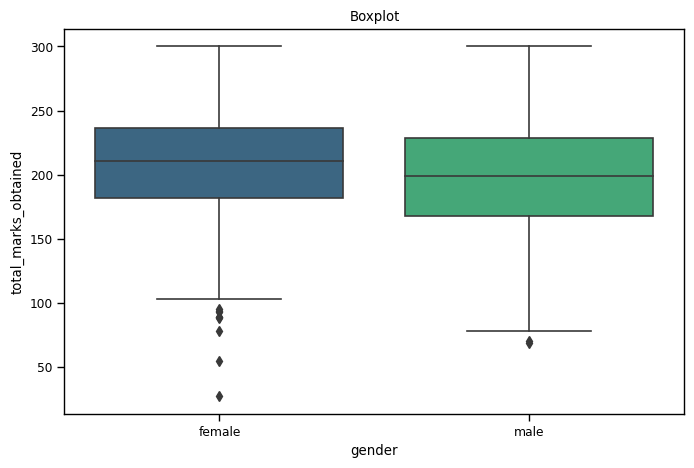

In [6]:
plt.figure(figsize=(8,5))
sns.set_context('paper')
sns.boxplot(data=df,y='total_marks_obtained',x='gender',palette='viridis')
plt.title('Boxplot')
plt.show()

In [7]:
df['percentage'] = (df['total_marks_obtained']/df['total_marks']) * 100
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_marks_obtained,total_marks,percentage
995,female,group E,master's degree,standard,completed,88,99,95,282,300,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,300,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,300,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,300,74.333333
999,female,group D,some college,free/reduced,none,77,86,86,249,300,83.000000


<AxesSubplot:xlabel='percentage', ylabel='Count'>

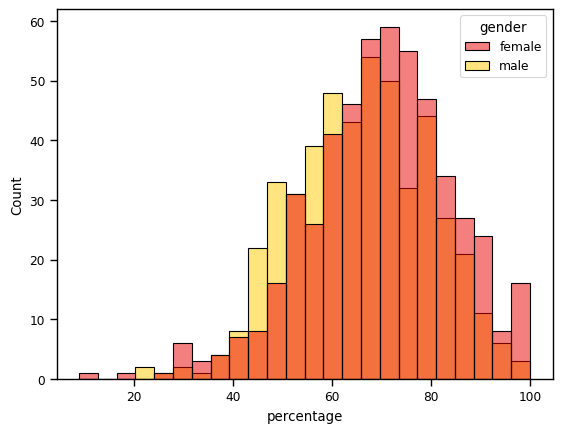

In [8]:
sns.set_context('paper')
sns.histplot(data=df,x='percentage',hue='gender',palette='hot')

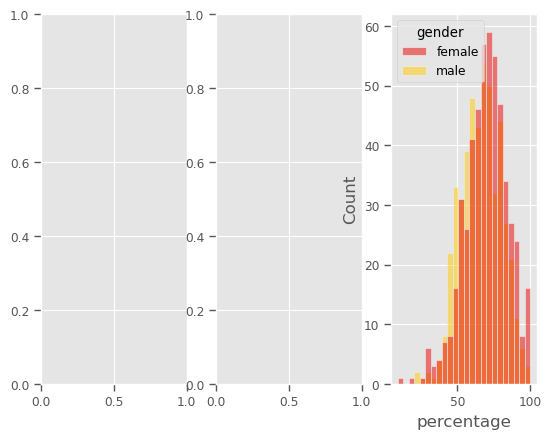

In [49]:
fig,ax = plt.subplots(1,3)
ax = sns.histplot(data=df,x='percentage',hue='gender',palette='hot')

In [9]:
def grade(percentage):
    if percentage >= 90.00:
        return "O"
    elif percentage >= 80.00:
        return 'A'
    elif percentage >= 70.00:
        return 'B'
    elif percentage >= 60.00:
        return 'C'
    elif percentage >= 50.00:
        return 'D'
    elif percentage >= 40.00:
        return 'E'
    else:
        return 'F'

In [10]:
df.rename(columns={'parental level of education':'Education Level'},inplace=True)
df.head()

,gender,race/ethnicity,Education Level,lunch,test preparation course,math score,reading score,writing score,total_marks_obtained,total_marks,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,300,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,300,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,300,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,300,49.333333
4,male,group C,some college,standard,none,76,78,75,229,300,76.333333


In [11]:
df.isnull().sum()

gender                     0
race/ethnicity             0
Education Level            0
lunch                      0
test preparation course    0
math score                 0
reading score              0
writing score              0
total_marks_obtained       0
total_marks                0
percentage                 0
dtype: int64

In [12]:
df['Grade'] = df['percentage'].apply(lambda x:grade(x))
df.head()

,gender,race/ethnicity,Education Level,lunch,test preparation course,math score,reading score,writing score,total_marks_obtained,total_marks,percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,300,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,247,300,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,278,300,92.666667,O
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,300,49.333333,E
4,male,group C,some college,standard,none,76,78,75,229,300,76.333333,B


<AxesSubplot:xlabel='Grade', ylabel='count'>

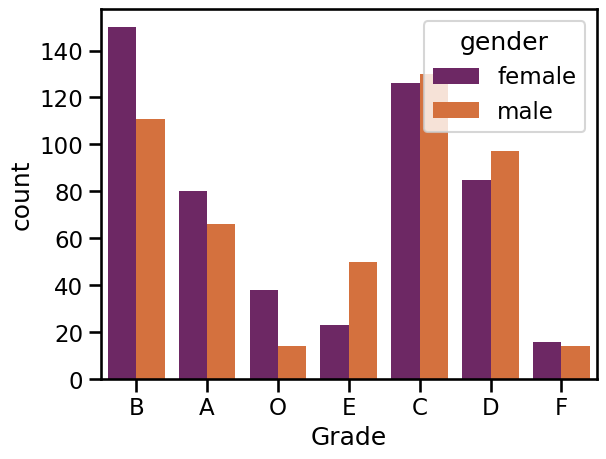

In [13]:
sns.set_context('talk')
sns.countplot(data=df,x='Grade',hue='gender',palette='inferno')

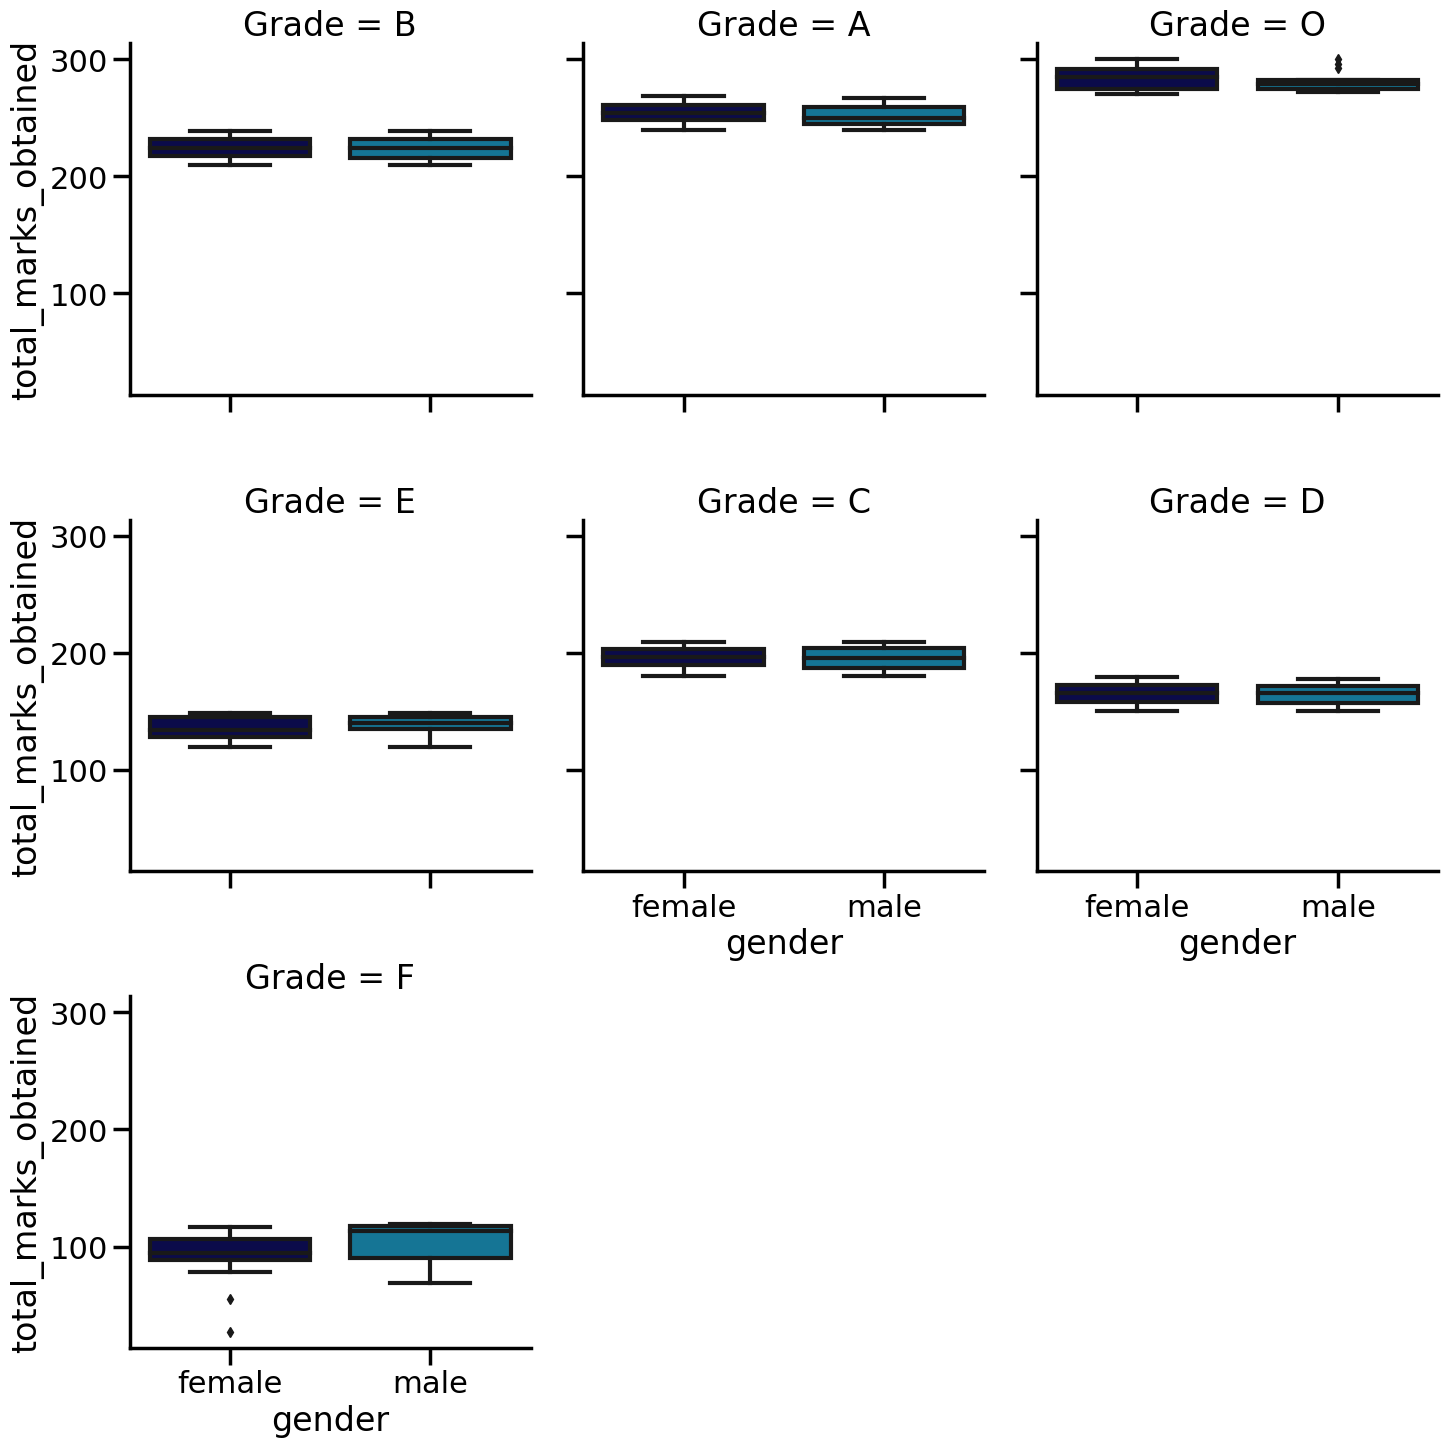

In [14]:
sns.set_context('poster')
sns.catplot(data=df,x='gender',y='total_marks_obtained',palette='ocean',col='Grade',kind='box',col_wrap=3)

In [15]:
df['Attendence'] = np.random.randint(1,100,1000)
df.sample()

,gender,race/ethnicity,Education Level,lunch,test preparation course,math score,reading score,writing score,total_marks_obtained,total_marks,percentage,Grade,Attendence
212,female,group C,high school,free/reduced,none,42,62,60,164,300,54.666667,D,18


In [16]:
df.head()

,gender,race/ethnicity,Education Level,lunch,test preparation course,math score,reading score,writing score,total_marks_obtained,total_marks,percentage,Grade,Attendence
0,female,group B,bachelor's degree,standard,none,72,72,74,218,300,72.666667,B,60
1,female,group C,some college,standard,completed,69,90,88,247,300,82.333333,A,4
2,female,group B,master's degree,standard,none,90,95,93,278,300,92.666667,O,59
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,300,49.333333,E,47
4,male,group C,some college,standard,none,76,78,75,229,300,76.333333,B,92


In [17]:
df.describe()

,math score,reading score,writing score,total_marks_obtained,total_marks,percentage,Attendence
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,300.0,67.770667,52.979000
std,15.16308,14.600192,15.195657,42.771978,0.0,14.257326,28.106058
min,0.00000,17.000000,10.000000,27.000000,300.0,9.000000,1.000000
25%,57.00000,59.000000,57.750000,175.000000,300.0,58.333333,29.000000
50%,66.00000,70.000000,69.000000,205.000000,300.0,68.333333,55.000000
75%,77.00000,79.000000,79.000000,233.000000,300.0,77.666667,78.000000
max,100.00000,100.000000,100.000000,300.000000,300.0,100.000000,99.000000


In [18]:
df['Study Hours'] = np.random.randint(1,10,1000)
df.head()

,gender,race/ethnicity,Education Level,lunch,test preparation course,math score,reading score,writing score,total_marks_obtained,total_marks,percentage,Grade,Attendence,Study Hours
0,female,group B,bachelor's degree,standard,none,72,72,74,218,300,72.666667,B,60,6
1,female,group C,some college,standard,completed,69,90,88,247,300,82.333333,A,4,4
2,female,group B,master's degree,standard,none,90,95,93,278,300,92.666667,O,59,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,300,49.333333,E,47,9
4,male,group C,some college,standard,none,76,78,75,229,300,76.333333,B,92,7


In [19]:
df[df['Grade'] == 'O'].head()

,gender,race/ethnicity,Education Level,lunch,test preparation course,math score,reading score,writing score,total_marks_obtained,total_marks,percentage,Grade,Attendence,Study Hours
2,female,group B,master's degree,standard,none,90,95,93,278,300,92.666667,O,59,1
6,female,group B,some college,standard,completed,88,95,92,275,300,91.666667,O,86,2
104,male,group C,some college,standard,completed,98,86,90,274,300,91.333333,O,62,2
106,female,group D,master's degree,standard,none,87,100,100,287,300,95.666667,O,20,8
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,300,99.666667,O,47,5


In [20]:
df.drop(columns=['Attendence','Study Hours'],inplace=True)

In [21]:
df.head()

,gender,race/ethnicity,Education Level,lunch,test preparation course,math score,reading score,writing score,total_marks_obtained,total_marks,percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,300,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,247,300,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,278,300,92.666667,O
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,300,49.333333,E
4,male,group C,some college,standard,none,76,78,75,229,300,76.333333,B


In [22]:
def attendence(grade):
    if grade == 'O':
        return np.random.randint(85,100)
    if grade == 'A':
        return np.random.randint(80,85)
    if grade == 'B':
        return np.random.randint(70,85)
    if grade == 'C':
        return np.random.randint(60,70)
    if grade == 'D':
        return np.random.randint(45,60)
    if grade == 'E':
        return np.random.randint(30,45)
    if grade == 'F':
        return np.random.randint(1,30)
    

In [23]:
df['Attendence'] = df['Grade'].apply(lambda x:attendence(x))
df.head()

,gender,race/ethnicity,Education Level,lunch,test preparation course,math score,reading score,writing score,total_marks_obtained,total_marks,percentage,Grade,Attendence
0,female,group B,bachelor's degree,standard,none,72,72,74,218,300,72.666667,B,79
1,female,group C,some college,standard,completed,69,90,88,247,300,82.333333,A,84
2,female,group B,master's degree,standard,none,90,95,93,278,300,92.666667,O,97
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,300,49.333333,E,44
4,male,group C,some college,standard,none,76,78,75,229,300,76.333333,B,80


In [24]:
def studyhours(grade):
    if grade == 'O':
        return np.random.randint(9,12)
    if grade == 'A':
        return np.random.randint(7,10)
    if grade == 'B':
        return np.random.randint(5,7)
    if grade == 'C':
        return np.random.randint(3,5)
    if grade == 'D':
        return np.random.randint(1,3)
    if grade == 'E':
        return np.random.randint(1,2)
    if grade == 'F':
        return np.random.randint(0,1)


In [25]:
df['Study Hours'] = df['Grade'].apply(lambda x : studyhours(x))
df.sample(5)

,gender,race/ethnicity,Education Level,lunch,test preparation course,math score,reading score,writing score,total_marks_obtained,total_marks,percentage,Grade,Attendence,Study Hours
379,male,group A,bachelor's degree,standard,none,66,64,62,192,300,64.000000,C,61,4
54,female,group C,some high school,free/reduced,completed,71,84,87,242,300,80.666667,A,81,7
451,female,group E,some college,standard,none,100,92,97,289,300,96.333333,O,87,11
391,female,group D,some college,standard,none,77,68,77,222,300,74.000000,B,76,6
532,male,group E,associate's degree,standard,completed,62,61,58,181,300,60.333333,C,62,3


In [26]:
new_df = df[['math score','reading score','writing score','total_marks_obtained','total_marks','Attendence','Study Hours','percentage','Grade']]

In [27]:
new_df.head()

,math score,reading score,writing score,total_marks_obtained,total_marks,Attendence,Study Hours,percentage,Grade
0,72,72,74,218,300,79,6,72.666667,B
1,69,90,88,247,300,84,8,82.333333,A
2,90,95,93,278,300,97,9,92.666667,O
3,47,57,44,148,300,44,1,49.333333,E
4,76,78,75,229,300,80,6,76.333333,B


In [28]:
new_df.rename(columns={'math score':'Maths Score',
                       'reading score':'Reading Score',
                      'writing score':'Writing Score',
                      'total_marks_obtained': 'Total Marks obtained',
                      'total_marks':'Total Marks',
                      'percentage':'Percentage'},inplace=True)

C:\Users\BHAVESH\AppData\Local\Temp\ipykernel_22176\1222246050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns={'math score':'Maths Score',


In [29]:
new_df.head()

,Maths Score,Reading Score,Writing Score,Total Marks obtained,Total Marks,Attendence,Study Hours,Percentage,Grade
0,72,72,74,218,300,79,6,72.666667,B
1,69,90,88,247,300,84,8,82.333333,A
2,90,95,93,278,300,97,9,92.666667,O
3,47,57,44,148,300,44,1,49.333333,E
4,76,78,75,229,300,80,6,76.333333,B


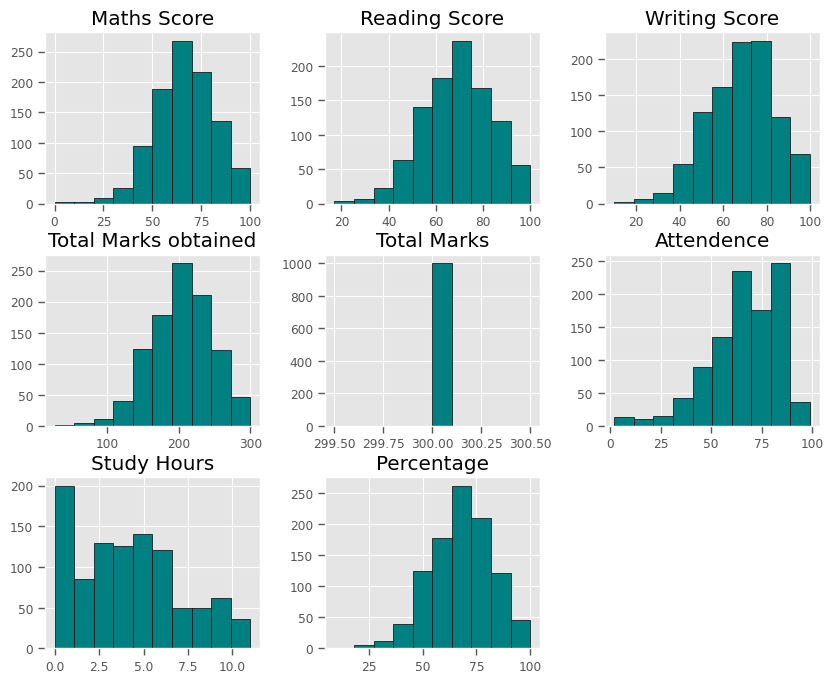

In [30]:
sns.set_context('paper')
plt.style.use('ggplot')
new_df.hist(figsize=(10,8),color='teal',edgecolor='black')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import OneHotEncoder,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [32]:
## Text Vectorization for training machine learning algorithm
grades = pd.get_dummies(df['Grade'])
grades.head()

,A,B,C,D,E,F,O
0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0


In [33]:
X = new_df.iloc[:,:-1]
y = grades

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [35]:
X_train.head()

,Maths Score,Reading Score,Writing Score,Total Marks obtained,Total Marks,Attendence,Study Hours,Percentage
541,79,82,80,241,300,84,8,80.333333
440,67,81,79,227,300,73,6,75.666667
482,68,68,61,197,300,60,3,65.666667
422,47,58,67,172,300,47,1,57.333333
778,72,79,82,233,300,74,6,77.666667


In [36]:
y_train.head()

,A,B,C,D,E,F,O
541,1,0,0,0,0,0,0
440,0,1,0,0,0,0,0
482,0,0,1,0,0,0,0
422,0,0,0,1,0,0,0
778,0,1,0,0,0,0,0


#### Model Building and Performance metrics

In [37]:
model = Pipeline(steps=[
    ('Step',DecisionTreeClassifier())
])
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,r2_score
print(f'Desicion Tree Classifier Accuracy:{accuracy_score(y_pred,y_test) * 100}')

Desicion Tree Classifier Accuracy:100.0


#### Random Forest Classifier

In [38]:
model2 = RandomForestClassifier()
model2.fit(X_train,y_train)
y_pred2 = model.predict(X_test)

from sklearn.metrics import accuracy_score,r2_score
print(f'Random Forest Classifier Accuracy :{accuracy_score(y_pred2,y_test) *100}')

Random Forest Classifier Accuracy :100.0


#### Cross Validataion

In [39]:
from sklearn.model_selection import cross_val_score
cvs = np.mean(cross_val_score(model,X,y,scoring='r2'))
print(f'Cross Validation Score: {cvs}')

Cross Validation Score: 0.9935035182457863


In [41]:
model3 = RandomForestRegressor()
model3.fit(X_train,y_train)

RandomForestRegressor()